In [1]:
# import data from google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
# read csv data
payment_trend = pd.read_csv("/content/drive/My Drive/Project_Data/payment_trend.csv")

# show data
payment_trend

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,00018f77f2f0320c557190d7a144bdd3,credit_card
2,000229ec398224ef6ca0657da4fc703e,credit_card
3,00024acbcdf0a6daa1e931b038114c75,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,boleto
117600,fffcd46ef2263f404302a634eb57f7eb,boleto
117601,fffce4705a9662cd70adb13d4a31832d,credit_card
117602,fffe18544ffabc95dfada21779c9644f,credit_card


In [4]:
# count missing value
payment_trend.isna().sum()

order_id        0
payment_type    3
dtype: int64

In [5]:
# count missing value
payment_trend.isna().sum()/len(payment_trend)*100

order_id        0.000000
payment_type    0.002551
dtype: float64

In [6]:
# find mode
mod_payment_type = payment_trend["payment_type"].mode()[0]

# input mode on the missing value
payment_trend["payment_type"] = payment_trend["payment_type"].fillna(mod_payment_type)

In [7]:
# check missing value
payment_trend.isna().sum()

order_id        0
payment_type    0
dtype: int64

In [8]:
# check outlier
payment_trend.describe()

,order_id,payment_type
count,117604,117604
unique,98666,4
top,895ab968e7bb0d5659d16cd74cd1650c,credit_card
freq,63,86772


<Axes: xlabel='payment_type', ylabel='Count'>

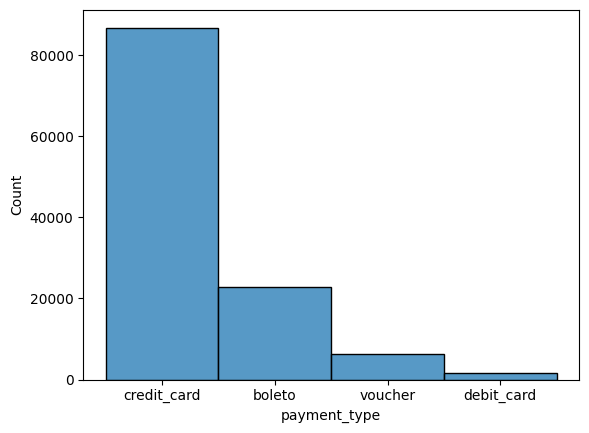

In [9]:
# visualise the outlier
sns.histplot(data=payment_trend, x="payment_type", bins=100)

In [10]:
# show data
payment_trend

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,00018f77f2f0320c557190d7a144bdd3,credit_card
2,000229ec398224ef6ca0657da4fc703e,credit_card
3,00024acbcdf0a6daa1e931b038114c75,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,boleto
117600,fffcd46ef2263f404302a634eb57f7eb,boleto
117601,fffce4705a9662cd70adb13d4a31832d,credit_card
117602,fffe18544ffabc95dfada21779c9644f,credit_card


In [11]:
# check duplicate
payment_trend.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
117599    False
117600    False
117601    False
117602    False
117603    False
Length: 117604, dtype: bool

In [12]:
# remove duplicate
payment_trend = payment_trend.drop_duplicates(subset=["order_id"])

In [13]:
# show data
payment_trend

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,00018f77f2f0320c557190d7a144bdd3,credit_card
2,000229ec398224ef6ca0657da4fc703e,credit_card
3,00024acbcdf0a6daa1e931b038114c75,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,boleto
117600,fffcd46ef2263f404302a634eb57f7eb,boleto
117601,fffce4705a9662cd70adb13d4a31832d,credit_card
117602,fffe18544ffabc95dfada21779c9644f,credit_card


In [14]:
# check inconsistent format
payment_trend["payment_type"].unique()

array(['credit_card', 'boleto', 'debit_card', 'voucher'], dtype=object)

In [15]:
# check inconsistent format & frequencies
payment_trend["payment_type"].value_counts()

credit_card    75992
boleto         19614
voucher         1540
debit_card      1520
Name: payment_type, dtype: int64

In [16]:
# show data
payment_trend

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,00018f77f2f0320c557190d7a144bdd3,credit_card
2,000229ec398224ef6ca0657da4fc703e,credit_card
3,00024acbcdf0a6daa1e931b038114c75,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,boleto
117600,fffcd46ef2263f404302a634eb57f7eb,boleto
117601,fffce4705a9662cd70adb13d4a31832d,credit_card
117602,fffe18544ffabc95dfada21779c9644f,credit_card


In [17]:
# pivot data
piv = payment_trend.pivot_table(values="order_id", index=["payment_type"], aggfunc="count", fill_value=0, margins=False)
piv

,order_id
payment_type,
boleto,19614
credit_card,75992
debit_card,1520
voucher,1540


In [18]:
# sort the data by the top 10 highest order
table_4 = piv.sort_values(by=["order_id"], ascending=False)
table_4

,order_id
payment_type,
credit_card,75992
boleto,19614
voucher,1540
debit_card,1520


Text(0, 0.5, 'Total Order')

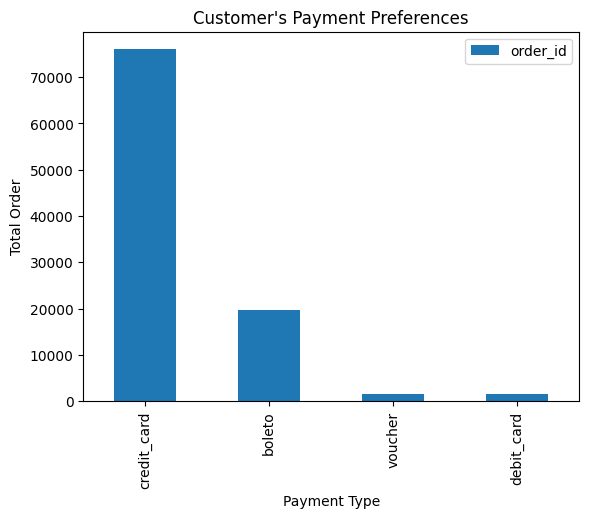

In [19]:
# visualise the data
table_plot4 = table_4.plot(kind='bar')
table_plot4.set_title("Customer's Payment Preferences")
table_plot4.set_xlabel("Payment Type")
table_plot4.set_ylabel("Total Order")